In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from src.env.dunderbot_env import DunderBotEnv
import src.run as run
import src.load as load

loading config from config/config.yml
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# TODO:

- BUG: hold is not registered since the big change
- Add portfolio features (need to understand how to best format different types of observations in Box -- e.g., can I pad with 0:s/NaN:s?)
- Refactor current reward and add some new ones (RLTRAder resets reward, check it out)
- Add reward output
- figure out how to normalize values properly
    * do we have to account for prediction as well? That is, can/should we predict using values outside of 0-1 range?
- understand the rendering, especially during learning
- Change policy network (need to understand terminology surronding it, e.g. envoronment, n_steps etc). See also discussion here (and elsewhere among Issues: https://github.com/hill-a/stable-baselines/issues/759)
- setup train/test functionality (separate reset functions? Multiple time periods for testing?)
- Check/Enable/Add exploration noise
- Understand how we should format observations, both for MLP and LSTM policy networks
- lock down the seeds (and decide in config from a few specific ones)
- setup performance output, what we need to make data driven decision
    *e.g. https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/master/1_getting_started.ipynb#scrollTo=63M8mSKR-6Zt
- Add benchmarks
- Find as long time series of BTCUSD hourly data as possible, quite shortright now
- Add smallest amount of bitcoin we can own, as well as trading precision
- Add finer temporal resolution in data (generate/download multiple granularity)
- Check float number type


# DONE: 
- add config
- modularize rewards
- own actions
- add more detailed actions for buy and sell amounts (still Discrete, I believe)
- wrap running code in function in main.py (to enable more dynamic data loading and train/test)
- own observations
- remove the bias when getting the observations (suggestion in the repo issues)
- download more interesting data and manually preprocess
- load interesting data, specified in config
- understand the time steps in learn and predict
- setup basic monitoring of training using TensorBoard
- Visualize basic performance
- Add support for fractions of shares
- Understand what should belong in what timestep (also decide on which price to plot as a result)
- add distributions of actions as output during prediction
- Refactor `_take_action` (might be something off in some calculations, also update terminology)
- Add commission and slippage

# Run

In [5]:
%%time
df = load.load_OHLC_data()
env = run.preprocess(df=df)
model = run.train(env=env, total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




--------------------------------------
| approxkl           | 5.5672957e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000132      |
| fps                | 172           |
| n_updates          | 1             |
| policy_entropy     | 2.1971703     |
| policy_loss        | -0.0017308617 |
| serial_timesteps   | 128           |
| time_elapsed       | 0.000323      |
| total_timesteps    | 128           |
| value_loss         | 78504.35      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006290674  |
| clipfrac           | 0.0           |
| explained_variance | -2.17e-05     |
| fps                | 230           |
| n_updates          | 10            |
| policy_entropy    

CPU times: user 42 s, sys: 3.86 s, total: 45.8 s
Wall time: 41.6 s


sell
buy
sell
sell
sell
hold
sell
sell
hold
hold
sell
sell
hold
sell
sell
buy
sell
sell
sell
sell
sell
sell
buy
sell
sell
sell
sell
hold
hold
hold
sell
sell
sell
sell
sell
sell
buy
sell
sell
sell
sell
sell
hold
sell
hold
buy
sell
sell
hold
sell


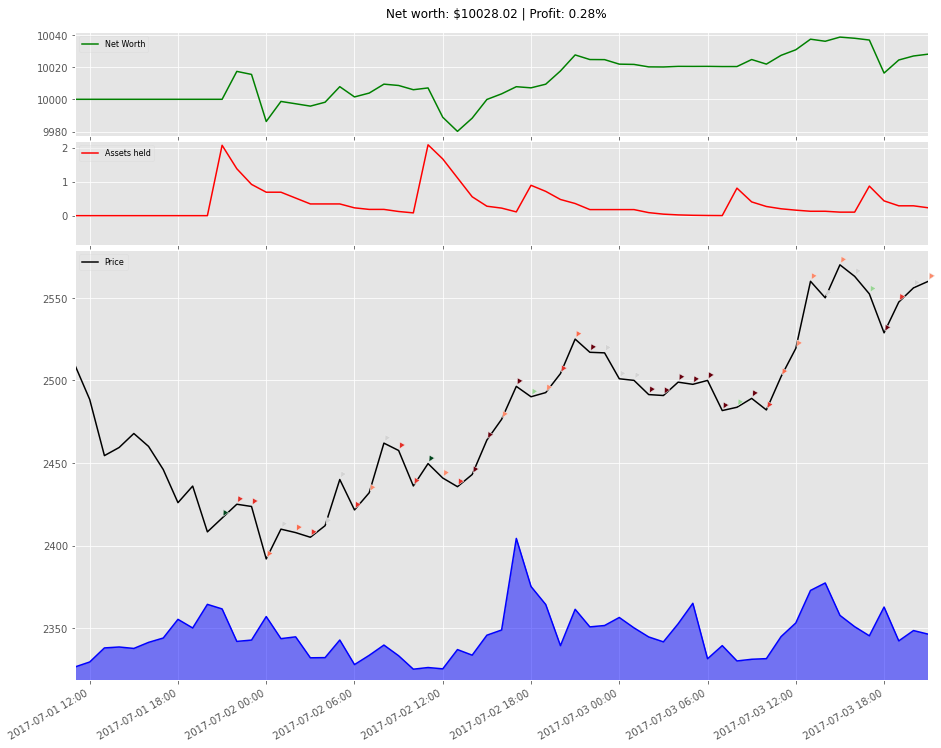

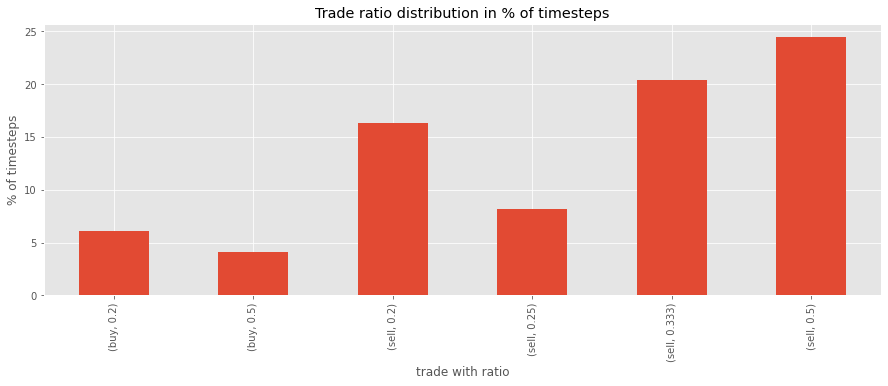

CPU times: user 12.4 s, sys: 587 ms, total: 13 s
Wall time: 13 s


In [7]:
%%time
run.predict(env=env, model=model, total_timesteps=50, rendermode='human')

In [8]:
import pickle
with open('all_dict_pred.pickle', 'rb') as f:
    x = pickle.load(f)
x

{'current_step': 59,
 'net_worths': [10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10017.32,
  10015.44,
  9986.24,
  9998.67,
  9997.23,
  9995.77,
  9998.19,
  10007.84,
  10001.48,
  10003.87,
  10009.4,
  10008.58,
  10005.95,
  10007.05,
  9988.86,
  9980.11,
  9988.3,
  9999.9,
  10003.39,
  10007.82,
  10007.12,
  10009.38,
  10017.58,
  10027.54,
  10024.68,
  10024.62,
  10021.82,
  10021.65,
  10020.12,
  10020.06,
  10020.43,
  10020.4,
  10020.43,
  10020.32,
  10020.33,
  10024.68,
  10021.84,
  10027.29,
  10030.74,
  10037.31,
  10036.02,
  10038.6,
  10037.88,
  10036.78,
  10016.29,
  10024.39,
  10026.88,
  10028.02],
 'trades': [{'step': 10,
   'amount': 2.06900547,
   'total': 5000.0,
   'type': 'buy',
   'action_amount': 0.5},
  {'step': 11,
   'amount': 0.68966849,
   'total': 1672.44,
   'type': 'sell',
   'action_amount': 0.3333333333333333},
  {'step': 12,
   'amount': 0.45977899,
   'to

In [9]:
x.keys()

dict_keys(['current_step', 'net_worths', 'trades', 'account_history'])